<a href="https://colab.research.google.com/github/hoivd/CS114.P11/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/Public'

CarDataset.csv		       CarDataset-Splits-4-Train.csv	     Hyundai
CarDataset-Splits-1-Test.csv   CarDataset-Splits-5-Test.csv	     KIA
CarDataset-Splits-1-Train.csv  CarDataset-Splits-5-Train.csv	     Mazda
CarDataset-Splits-2-Test.csv   CS114.P11.Clustering.ipynb	     Mitsubishi
CarDataset-Splits-2-Train.csv  CS114.P11.Tool.CreateSplit.Car.ipynb  Others
CarDataset-Splits-3-Test.csv   CS114.P11.Tool.DatasetStat.Car.ipynb  Suzuki
CarDataset-Splits-3-Train.csv  CS114.P11.Tool.DatasetViz.ipynb	     Toyota
CarDataset-Splits-4-Test.csv   Honda				     VinFast


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
import random
import os

def display_random_cars(path_df, root_path, num_img_per_row=10, img_heigth=1.5, img_width=1.5):
  cars_brand_set = {0 : 'Other', 1 : 'Honda', 2 : 'Hyundai', 3 : 'KIA',
                    4 : 'Mazda', 5 : 'Mitsubishi', 6 : 'Suzuki',
                    7 : 'Toyota', 8 : 'VinFast'}

  #GroupBy data theo từng CategoryID
  grouped_data = path_df.groupby('CategoryID')
  category_ids = grouped_data.groups.keys()
  n_category = len(category_ids)

  #Thiết lập kích thước subplot
  w_ratios = [2] + [1 for _ in range(num_img_per_row)]
  h_space = 0.1
  w_space = 0.1
  w_size = img_width * sum(w_ratios) + w_space * (len(w_ratios) - 1)
  h_size = img_heigth * n_category + h_space * (n_category - 1)

  #Tạo subplot
  fig, axes = plt.subplots(nrows=n_category, ncols=num_img_per_row + 1,
                           figsize=(w_size, h_size),
                           gridspec_kw={'width_ratios': w_ratios, 'wspace' : w_space, 'hspace' : h_space}
                           )

  #Plot tiêu đề và hình ảnh
  for i, category_id in enumerate(category_ids):
    #Plot tiêu đề (được đặt ở đầu dòng)
    brand_name = cars_brand_set[category_id]
    axes[i,0].text(0, 0.5, f"{brand_name}", ha = 'left', va = 'center', fontsize = img_width * 15, fontweight='bold')

    #Lấy data cho từng loại xe và chọn random theo num_img_per_row
    image_paths = grouped_data.get_group(category_id)['Path'].tolist()
    random_sample = random.sample(image_paths, num_img_per_row)

    #Plot image
    for j, image_path in enumerate(random_sample):
      random_path = os.path.join(root_path, image_path)
      # img = Image.open(random_path)
      img = cv2.imread(random_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.GaussianBlur(img,(5, 5), 0)
      axes[i,j + 1].imshow(img, aspect='auto')
      axes[i,j + 1].axis('off')
    axes[i,0].axis('off')
  plt.show()

                                      Path  CategoryID
0  Others/22521070-22520211.Others.263.jpg           0
1  Others/22521070-22520211.Others.268.jpg           0
2  Others/22521070-22520211.Others.267.jpg           0
3  Others/22521070-22520211.Others.272.jpg           0
4  Others/22521070-22520211.Others.271.jpg           0
[0 1 2 3 4 5 6 7 8]


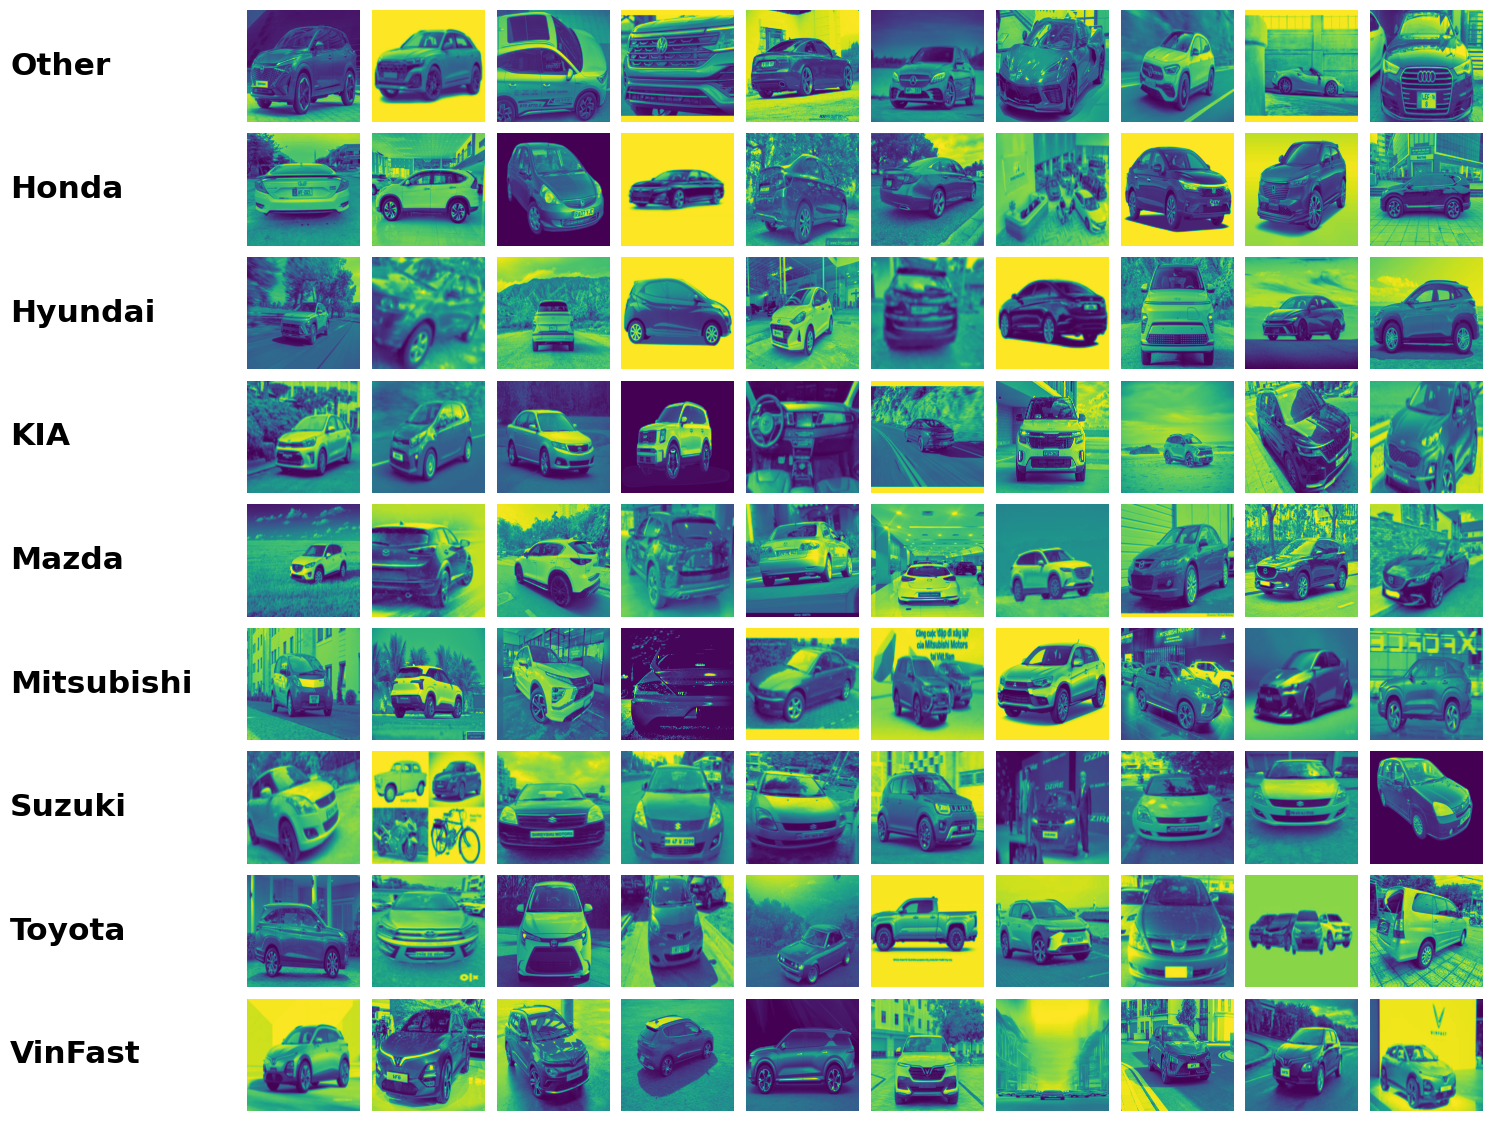

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Đọc file chưa path của image
path_data = '/content/drive/MyDrive/Colab Notebooks/data/CarDataset-Splits-1-train.csv'
path_df = pd.read_csv(path_data)
print(path_df.head())
print(path_df['CategoryID'].unique())

#In random image theo từng category trong file
images_save_path = '/content/drive/MyDrive/Public'
display_random_cars(path_df, images_save_path)

In [ ]:
import cv2
# import tensorflow.keras.applications.mobilenet_v2.preprocess_input as preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Public/Others/22521070-22520211.Others.272.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
print(img.shape)
# # img = preprocess_input(img)
# # print(img.shape)
model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
img = np.expand_dims(img ,axis=0)
print(img.shape)
pred = model.predict(img)
print(pred.shape)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

(224, 224, 3)
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(1, 7, 7, 1280)


(224, 224)


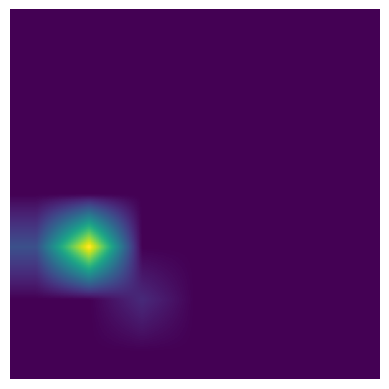

In [ ]:
img_feature = pred[0, :, : , 2]
img_feature = cv2.resize(img_feature, (224, 224))
print(img_feature.shape)
plt.imshow(img_feature)
plt.axis('off')
plt.show()

In [ ]:
path = pd.Series(path_df['Path'])
print(path.shape)
print(type(path))
print(path.head())
print(path.index  )

(26986,)
<class 'pandas.core.series.Series'>
0    Others/22521070-22520211.Others.263.jpg
1    Others/22521070-22520211.Others.268.jpg
2    Others/22521070-22520211.Others.267.jpg
3    Others/22521070-22520211.Others.272.jpg
4    Others/22521070-22520211.Others.271.jpg
Name: Path, dtype: object
RangeIndex(start=0, stop=26986, step=1)


In [61]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import cv2
import os

path_file = '/content/drive/MyDrive/test_path.csv'
data = pd.read_csv(path_file)
images = data['Path'].tolist()

base_direc = '/content/drive/MyDrive/Public'
for i, path in enumerate(images):
  images[i] = os.path.join(base_direc, path)

for i, path in enumerate(images):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224, 224))
  images[i] = img

dataset = tf.data.Dataset.from_tensor_slices(images)
print(dataset)

<_TensorSliceDataset element_spec=TensorSpec(shape=(224, 224, 3), dtype=tf.uint8, name=None)>


In [62]:
batched_dataset = dataset.batch(3)
for batch in batched_dataset:
  print(batch)
  print(batch.shape)

tf.Tensor(
[[[[  4  10  32]
   [  4  10  32]
   [  5  11  33]
   ...
   [ 11  18  37]
   [ 10  17  36]
   [ 10  17  36]]

  [[  4  10  32]
   [  4  10  32]
   [  5  11  33]
   ...
   [ 11  18  37]
   [ 10  17  36]
   [ 10  17  36]]

  [[  4  10  32]
   [  5  11  33]
   [  5  11  33]
   ...
   [ 11  18  37]
   [ 10  17  36]
   [ 10  17  36]]

  ...

  [[  3   9  25]
   [  3   9  25]
   [  3   9  25]
   ...
   [ 12  20  39]
   [ 11  19  38]
   [ 11  19  38]]

  [[  3   9  25]
   [  3   9  25]
   [  3   9  25]
   ...
   [ 12  20  39]
   [ 11  19  38]
   [ 11  19  38]]

  [[  3   9  25]
   [  3   9  25]
   [  3   9  25]
   ...
   [ 12  20  39]
   [ 11  19  38]
   [ 11  19  38]]]


 [[[  4   4   4]
   [  4   4   4]
   [  4   4   4]
   ...
   [ 21  21  23]
   [ 17  17  19]
   [ 13  13  15]]

  [[  4   4   4]
   [  4   4   4]
   [  4   4   4]
   ...
   [ 20  20  22]
   [ 17  17  19]
   [ 13  13  15]]

  [[  4   4   4]
   [  4   4   4]
   [  4   4   4]
   ...
   [ 20  20  22]
   [ 17  17  19]


In [ ]:
from tensorflow.keras.applications import MobileNetV2

